In [9]:
from qiskit.opflow import PauliTrotterEvolution, SummedOp, X, Z, I
from qiskit import Aer
from qiskit import Aer, IBMQ, QuantumCircuit, execute
import matplotlib.pyplot as plt  # Импортируем Matplotlib для визуализации
import sys

D:\_petrsu\quantum_computing\venv\lib\site-packages\ipykernel_launcher.py:7: DeprecationWarning: The class ``qiskit.opflow.evolutions.pauli_trotter_evolution.PauliTrotterEvolution`` is deprecated as of qiskit-terra 0.24.0. It will be removed no earlier than 3 months after the release date. For code migration guidelines, visit https://qisk.it/opflow_migration.
  import sys


Квантовая схема эволюции:


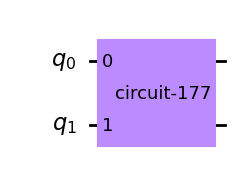

In [10]:
# Определение сложного гамильтониана H = XZ + ZI + IX
H = (X ^ Z) + (Z ^ I) + (I ^ X)

# Определяем временной интервал и эволюцию
t = 1.0
evolution_op = (t * H).exp_i()
evolution = PauliTrotterEvolution().convert(evolution_op)

# Создание квантовой схемы для визуализации
qc = QuantumCircuit(2)  # Предполагаем, что у нас 2 кубита
qc.append(evolution, range(2))  # Добавляем операцию эволюции в схему

# Визуализируем квантовую схему
print("Квантовая схема эволюции:")
qc.draw("mpl")  # Отображаем схему в формате matplotlib

In [11]:
# Выполняем на симуляторе
backend = Aer.get_backend('statevector_simulator')
evolved_state = evolution.eval()
print("Эволюция для большого гамильтониана:", evolved_state)

Эволюция для большого гамильтониана: Operator([[ 0.15772861-0.24564775j, -0.3825737 -0.24564775j,
           -0.3825737 -0.24564775j,  0.3825737 -0.59582324j],
          [-0.3825737 -0.24564775j,  0.15772861-0.24564775j,
           -0.3825737 +0.59582324j,  0.3825737 +0.24564775j],
          [ 0.3825737 -0.24564775j,  0.3825737 +0.59582324j,
            0.15772861+0.24564775j,  0.3825737 -0.24564775j],
          [-0.3825737 -0.59582324j, -0.3825737 +0.24564775j,
            0.3825737 -0.24564775j,  0.15772861+0.24564775j]],
         input_dims=(2, 2), output_dims=(2, 2))
